In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [50]:
dtheta= np.pi/4
EAST = 0
NORTH = np.pi/2
WEST = np.pi
SOUTH = 3*np.pi/2

In [51]:
def closed_form_autopilot(x, y, theta, v, dtheta):
    # Determine the distance needed to complete U-turn, quarter_turn
    # Use Law of Sines to determine radius of turn circle
    rad = v*np.sin((np.pi-dtheta)/2)/np.sin(dtheta)
    quarter_turn_dist = rad
    U_turn_dist = 2*rad
    
    # Assume Runway can only be approached from the east side, and the arrival point is at (0,0)
    
    # Return straight heading if plane is already on track to land
    if x > 0 and np.isclose(y,0) and theta > np.pi-dtheta and theta < np.pi+dtheta:
        return min(np.pi-theta, dtheta) if np.pi-theta > 0 else max(np.pi-theta, -dtheta) # adjust heading to be np.pi

    # If in front of runway, adjust heading so that landing can happen
    # Landing zone is defined as a strip starting rad to the right of the landing strip
    # and extending from y=-rad to y=rad. 
    if x > 0 and y >= -rad and y <= rad:
        # Define cases based on y coordinate, and east vs. west heading
        if theta > np.pi/2 and theta < 3*np.pi/2:
            # determine the angle to approach y = 0 if close enough
            if y > 0 and (theta >= np.pi or theta+dtheta >= np.pi) and y <= v*np.sin(dtheta):
                #print('e')
                return max(-dtheta, min(np.arcsin(y/v)+np.pi-theta, dtheta))
            if y < 0 and (theta <= np.pi or theta-dtheta <= np.pi) and y >= -v*np.sin(dtheta):
                #print('e')
                return min(dtheta, max(np.pi-np.arcsin(abs(y)/v)-theta,-dtheta))
                
            #     target_theta = 3*np.pi/2 - np.arccos(y/v) if y >= 0 else np.pi/2+np.arccos(y/v)
            #     return max(target_theta-theta, -dtheta) if target_theta-theta <= 0 else min(target_theta, dtheta)
            
            # Adjust to trajectory that assures a proper descent angle
            if y > 0 and theta > np.pi:
                if theta - np.pi > np.arctan(y/(x-rad)) and theta - np.pi < dtheta:
                    #print('a')
                    return 0
                elif x > 1.5*rad and y/np.tan(theta-np.pi) > x-1.5*rad:
                    #print('b')
                    # if theta - np.pi >= dtheta or y/np.tan(dtheta) > x-rad:
                    return min(dtheta,max(3*np.pi/2-theta,-dtheta))
                    # else:
                    #     return min(dtheta+np.pi-theta, dtheta)
                elif theta - np.pi > (x-1.5*rad)//v*dtheta or y < (v*np.sin(theta-np.pi))*((x-1.5*rad)//v+1):
                    #print('c',np.arctan(y/(x-rad))+np.pi-theta, theta-np.pi)
                    return max(min(np.arctan(y/(x-1.5*rad))+np.pi-theta,theta), -dtheta)
                else:
                    #print('d', dtheta+np.pi-theta)
                    return 0#min(dtheta+np.pi-theta, dtheta)
            elif y < 0 and theta < np.pi:
                if np.pi - theta > np.arctan(abs(y)/(x-rad)) and np.pi - theta < dtheta:
                    #print('a')
                    return 0
                elif x > 1.5*rad and abs(y)/np.tan(np.pi-theta) > x-1.5*rad:
                    #print('b')
                    # if np.pi - theta >= dtheta or abs(y)/np.tan(dtheta) > x-rad:
                    return max(-dtheta,min(np.pi/2-theta,dtheta))
                    # else:
                    #     return max(np.pi-dtheta-theta, -dtheta)
                elif np.pi - theta > (x-1.5*rad)//v*dtheta or y > (-v*np.sin(np.pi-theta))*((x-1.5*rad)//v+1):
                    #print('c',np.pi-np.arctan(abs(y)/(x-rad))-theta, np.pi-theta)
                    return min(max(np.pi - np.arctan(abs(y)/(x-1.5*rad))-theta,-theta), dtheta)
                else:
                    #print('d')
                    return 0#max(np.pi-dtheta-theta, -dtheta)
            elif y >= 0 and theta <= np.pi:
                return dtheta
            else:
                return -dtheta
        elif theta < np.pi/2: # heading east
            return min(dtheta, max(np.pi/2-theta,-dtheta))
        elif theta > 3*np.pi/2:
            return max(min(3*np.pi/2-theta,dtheta), -dtheta)
        else: # straight up or straight down
            return dtheta if np.isclose(theta, np.pi/2) else -dtheta
    # If in front of runway, between rad and 2*rad north or south of the landing axis
    if x > 0 and (y >= -2*rad and y < -rad) or (y > rad and y <= 2*rad):
        # Adjust to go either straight up or straight down
        if theta < np.pi:
            return min(np.pi/2-theta,dtheta) if theta < np.pi/2 else max(np.pi/2-theta,-dtheta)
        else:
            return min(3*np.pi/2-theta,dtheta) if theta < 3*np.pi/2 else max(3*np.pi/2-theta,-dtheta)
    # If east of the runway, beyond 2*rad north or south of the landing axis
    if x > 2*rad and y > 2*rad:
        # Circle clockwise until facing south
        return max(-dtheta, -np.pi/2-theta) if theta < 3*np.pi/2 else max(-dtheta, 3*np.pi/2-theta)
    if x > 2*rad and y < -2*rad:
        # Circle counterclockwise until facing north
        return min(dtheta, np.pi/2-theta) if theta < np.pi/2 else min(dtheta, 5*np.pi/2-theta)
    # If west of the runway, between between -2*rad south and 2*rad north of landing axis
    if y >= -2*rad and y <= 2*rad:
        # move north or south to get clear of takeoff zone!
        if theta < np.pi:
            return min(dtheta, np.pi/2-theta) if theta < np.pi/2 else max(-dtheta,np.pi/2-theta)
        else:
            return min(dtheta, 3*np.pi/2-theta) if theta < 3*np.pi/2 else max(-dtheta,3*np.pi/2-theta)
    # If west of the runway, below -2*rad south and above 2*rad north of landing axis
    if y > 2*rad:
        # Clockwise turn east
        return max(-dtheta,0-theta)
    if y < -2*rad:
        # Counter-Clockwise turn east
        return min(dtheta, 2*np.pi-theta)
    # Unhandled cases go here
    print("Unhandled case")
    raise Error()

In [52]:
class Airplane():
    def __init__(self, x, y, theta, v, dtheta):
        self.x = x
        self.y = y
        self.log = np.reshape(np.array([x,y,theta]), (1,3))
        self.theta = theta
        self.v = v
        self.dtheta = dtheta
        self.rad = v*np.sin((np.pi-dtheta)/2)/np.sin(dtheta)
    def update(self):
        action = closed_form_autopilot(self.x, self.y, self.theta, self.v, self.dtheta)
        assert abs(action) <= a.dtheta
        self.theta = self.theta + action
        if self.theta < 0:
            self.theta += 2*np.pi
        if self.theta > 2*np.pi:
            self.theta -= 2*np.pi
        self.x = self.x + self.v*np.cos(self.theta)
        self.y = self.y + self.v*np.sin(self.theta)
        self.log = np.append(self.log, np.reshape(np.array([self.x, self.y,self.theta]), (1,3)), axis=0)
    def plot(self):
        plt.plot(np.linspace(-10*self.rad, 10*self.rad, 100), [-2*self.rad]*100)
        plt.plot(np.linspace(self.rad, 10*self.rad, 45), [-self.rad]*45)
        plt.plot(np.linspace(-10*self.rad, 10*self.rad, 100), [0]*100)
        plt.plot(np.linspace(self.rad, 10*self.rad, 45), [self.rad]*45)
        plt.plot(np.linspace(-10*self.rad, 10*self.rad, 100), [2*self.rad]*100)
        plt.plot([self.rad]*100, np.linspace(-4*self.rad,4*self.rad,100))
        plt.scatter(0,0)
        
        plt.plot(self.log[:,0], self.log[:,1])
        plt.show()

Test cases:

In [53]:
v = 200/3600 # miles per second
dtheta = 3*np.pi/180 # radians per second
rad = v*np.sin((np.pi-dtheta)/2)/np.sin(dtheta) # miles

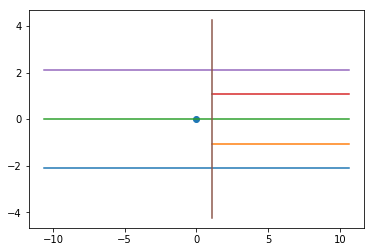

In [54]:
# First, and outline of the board (with landing zone at 0,0)
plt.plot(np.linspace(-10*rad, 10*rad, 100), [-2*rad]*100)
plt.plot(np.linspace(rad, 10*rad, 45), [-rad]*45)
plt.plot(np.linspace(-10*rad, 10*rad, 100), [0]*100)
plt.plot(np.linspace(rad, 10*rad, 45), [rad]*45)
plt.plot(np.linspace(-10*rad, 10*rad, 100), [2*rad]*100)
plt.plot([rad]*100, np.linspace(-4*rad,4*rad,100))
plt.scatter(0,0)
plt.show()

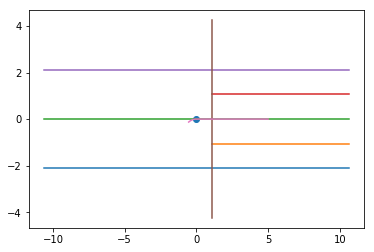

In [55]:
# Plane on track to land
a = Airplane(5, 0, np.pi, v, dtheta)
for i in range(100):
    a.update()
    # print(a.x,a.y,a.theta)
a.plot()

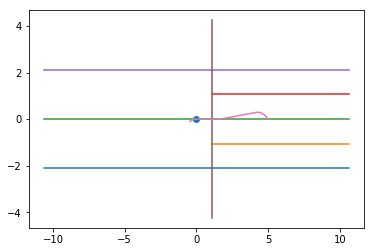

In [56]:
a = Airplane(5, 0, 3*np.pi/4, v, dtheta)
for i in range(100):
    a.update()
    #print(i,a.x,a.y,a.theta)
a.plot()

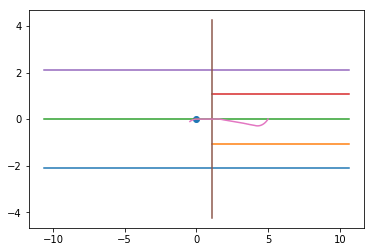

In [57]:
a = Airplane(5, 0, 5*np.pi/4, v, dtheta)
for i in range(100):
    a.update()
    # print(i,a.x,a.y,a.theta, 2*np.pi-a.theta)
a.plot()

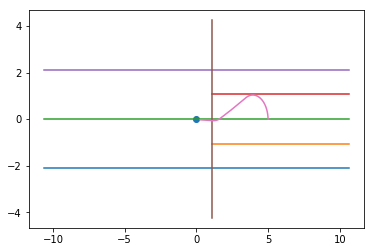

In [58]:
a = Airplane(5, 0, np.pi/2, v, dtheta)
for i in range(100):
    a.update()
    #print(i,a.x,a.y,a.theta, 2*np.pi-a.theta)
a.plot()

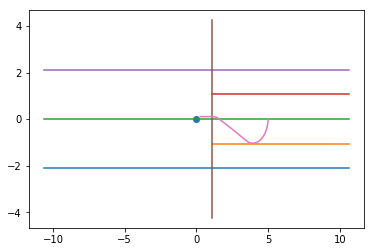

In [59]:
a = Airplane(5, 0, 3*np.pi/2, v, dtheta)
for i in range(100):
    a.update()
    #print(i,a.x,a.y,a.theta, 2*np.pi-a.theta)
a.plot()

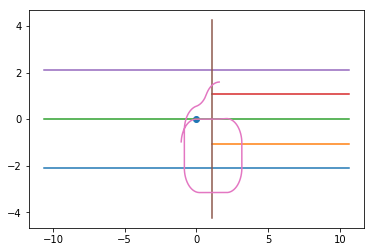

In [60]:
a = Airplane(1.5*rad, 1.5*rad, -np.pi, v, dtheta)
for i in range(300):
    a.update()
    # print(i,a.x,a.y,a.theta, 2*np.pi-a.theta)
a.plot()

In [17]:
v

0.05555555555555555

In [18]:
rad

1.0611541670586235

In [48]:
dtheta

0.05235987755982988